# Payment Date Prediction 


### Importing related Libraries 

In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings("ignore")

### Store the dataset into the Dataframe


In [62]:
df=pd.read_csv("dataset.csv")

### Check the shape of the dataframe


In [63]:
df.shape

(50000, 19)

### Display the content of dataframe

In [64]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1930438491.0,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.3,20200126.0,NAH4,1930438491.0,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1929646410.0,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.6,20190722.0,NAD1,1929646410.0,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1929873765.0,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.9,20190914.0,NAA8,1929873765.0,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2960623488.0,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.7,20200331.0,CA10,2960623488.0,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1930147974.0,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.3,20191113.0,NAH4,1930147974.0,0


### Check the Detail information of the dataframe

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

### Display All the column names

In [66]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Describe the entire dataset

In [67]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,0.0,50000.0,50000.0,49994.0,50000.0
mean,2019.3,2012238146.0,20193514.4,20193538.0,20193679.3,1.0,NaN,32337.0,20193539.9,2011339506.7,0.2
std,0.5,288523548.9,4496.0,4482.1,4470.6,0.0,NaN,39206.0,4482.7,276633494.1,0.4
min,2019.0,1928501756.0,20181226.0,20181230.0,20181224.0,1.0,NaN,0.7,20181214.0,1928501756.0,0.0
25%,2019.0,1929342131.5,20190505.0,20190506.0,20190524.0,1.0,NaN,4928.3,20190505.0,1929342050.5,0.0
50%,2019.0,1929963919.5,20190908.0,20190909.0,20190926.0,1.0,NaN,17609.0,20190909.0,1929963780.5,0.0
75%,2020.0,1930618818.2,20200130.0,20200131.0,20200216.0,1.0,NaN,47133.6,20200131.0,1930618752.5,0.0
max,2020.0,9500000133.0,20200522.0,20200522.0,20200710.0,1.0,NaN,668593.4,20200522.0,2960635652.0,1.0


# Data Cleaning

- Show top 5 records from the dataset

In [68]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1930438491.0,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.3,20200126.0,NAH4,1930438491.0,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1929646410.0,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.6,20190722.0,NAD1,1929646410.0,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1929873765.0,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.9,20190914.0,NAA8,1929873765.0,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2960623488.0,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.7,20200331.0,CA10,2960623488.0,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1930147974.0,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.3,20191113.0,NAH4,1930147974.0,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [69]:
missing_value=df.isna()
num_missing_value=missing_value.sum()
Null_Percentage=(num_missing_value/len(df))*100
colu=[col for col in df.columns if df[col].isnull().sum()>0]
j=0
for i in Null_Percentage:
    if i>0:
        print(colu[j],"=",i,"% null",end=", ")
        j=j+1
        
        


clear_date = 20.0 % null, area_business = 100.0 % null, invoice_id = 0.012 % null, 

### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [70]:
df[["doc_id","invoice_id"]]

,doc_id,invoice_id
0,1930438491.0,1930438491.0
1,1929646410.0,1929646410.0
2,1929873765.0,1929873765.0
3,2960623488.0,2960623488.0
4,1930147974.0,1930147974.0
...,...,...
49995,1930797071.0,1930797071.0
49996,1929744070.0,1929744070.0
49997,1930536775.0,1930536775.0
49998,1930198546.0,1930198546.0


#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [71]:
df1=df[['baseline_create_date',"document_create_date",'document_create_date.1']]
df1.corr()

,baseline_create_date,document_create_date,document_create_date.1
baseline_create_date,1.0,1.0,1.0
document_create_date,1.0,1.0,1.0
document_create_date.1,1.0,1.0,1.0


###### Yes, they are almost same as the correlation value is almost 1 , so we will be droping later kepping only 1 of these columns later

#### Please check, Column 'posting_id' is constant columns or not


In [72]:
df['posting_id'].nunique()
    

1

##### Yes, it is a constat column as there is only 1 unique value.

#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [73]:
df["isOpen"].unique()

array([0, 1], dtype=int64)

In [74]:
df["isOpen"].value_counts()

0    40000
1    10000
Name: isOpen, dtype: int64

##### isopen is binay valued feature which contains two value 0 and 1 

### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [75]:
df.drop(['invoice_id','area_business','posting_id','document_create_date','isOpen','document type','document_create_date.1'],axis=1,inplace=True)


### Please check from the dataframe whether all the columns are removed or not 

In [76]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1930438491.0,2020-01-26,20200210.0,USD,54273.3,20200126.0,NAH4
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1929646410.0,2019-07-22,20190811.0,USD,79656.6,20190722.0,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1929873765.0,2019-09-14,20190929.0,USD,2253.9,20190914.0,NAA8
3,CA02,0140105686,SYSC llc,NaN,2020.0,2960623488.0,2020-03-30,20200410.0,CAD,3299.7,20200331.0,CA10
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1930147974.0,2019-11-13,20191128.0,USD,33133.3,20191113.0,NAH4


In [77]:
df.shape

(50000, 12)

### Show all the Duplicate rows from the dataframe

In [78]:
df[df.duplicated()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,0200769623,WAL-MAR in,2019-03-12 00:00:00,2019.0,1928870382.0,2019-02-28,20190315.0,USD,19557.4,20190228.0,NAH4
2400,U001,0200769623,WAL-MAR trust,2019-08-28 00:00:00,2019.0,1929758460.0,2019-08-18,20190902.0,USD,5600.4,20190818.0,NAH4
2584,U001,0200769623,WAL-MAR corporation,2019-12-16 00:00:00,2019.0,1930216806.0,2019-12-04,20191219.0,USD,35352.2,20191204.0,NAH4
3755,U001,0200769623,WAL-MAR,2019-11-22 00:00:00,2019.0,1930137035.0,2019-11-12,20191127.0,USD,2982.6,20191112.0,NAH4
3873,CA02,0140104409,LOB associates,NaN,2020.0,2960628616.0,2020-04-14,20200425.0,CAD,82975.8,20200415.0,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49928,U001,0200915438,GROC trust,2019-08-15 00:00:00,2019.0,1929645942.0,2019-07-25,20190809.0,USD,6969.0,20190725.0,NAA8
49963,U001,0200759878,SA us,2019-01-29 00:00:00,2019.0,1928613993.0,2019-01-13,20190128.0,USD,10968.2,20190113.0,NAH4
49986,U001,0200772670,ASSOCIAT foundation,2019-06-12 00:00:00,2019.0,1929403090.0,2019-05-29,20190613.0,USD,155837.5,20190529.0,NAU5
49990,U001,0200765011,MAINES llc,2019-06-06 00:00:00,2019.0,1929365364.0,2019-05-22,20190606.0,USD,4008.1,20190522.0,NAA8


### Display the Number of Duplicate Rows

In [79]:
df.duplicated().sum()

1161

### Drop all the Duplicate Rows

In [80]:
df.drop_duplicates(keep="first",inplace=True)

#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [81]:
df.duplicated().sum()

0

### Check for the number of Rows and Columns in your dataset

In [82]:
df.shape

(48839, 12)

### Find out the total count of null values in each columns

In [83]:
df.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

#Data type Conversion 

### Please check the data type of each column of the dataframe

In [84]:
df.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
doc_id                  float64
posting_date             object
due_in_date             float64
invoice_currency         object
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms       object
dtype: object

### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [85]:
df[['clear_date','posting_date','due_in_date','baseline_create_date']].dtypes

clear_date               object
posting_date             object
due_in_date             float64
baseline_create_date    float64
dtype: object

### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [86]:
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['clear_date'] = pd.to_datetime(df['clear_date'], format='%Y-%m-%d')
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'], format='%Y%m%d')

### Please check the datatype of all the columns after conversion of the above 4 columns

In [87]:
df[['clear_date','posting_date','due_in_date','baseline_create_date']].dtypes

clear_date              datetime64[ns]
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
baseline_create_date    datetime64[ns]
dtype: object

In [88]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1930438491.0,2020-01-26,2020-02-10,USD,54273.3,2020-01-26,NAH4
1,U001,0200980828,BEN E,2019-08-08,2019.0,1929646410.0,2019-07-22,2019-08-11,USD,79656.6,2019-07-22,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1929873765.0,2019-09-14,2019-09-29,USD,2253.9,2019-09-14,NAA8
3,CA02,0140105686,SYSC llc,NaT,2020.0,2960623488.0,2020-03-30,2020-04-10,CAD,3299.7,2020-03-31,CA10
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1930147974.0,2019-11-13,2019-11-28,USD,33133.3,2019-11-13,NAH4


#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [89]:
df["invoice_currency"].value_counts()

USD    45011
CAD     3828
Name: invoice_currency, dtype: int64

#### display the "total_open_amount" column value

In [90]:
df["total_open_amount"]

0       54273.3
1       79656.6
2        2253.9
3        3299.7
4       33133.3
          ...  
49995    3187.9
49996    6766.5
49997    6120.9
49998      63.5
49999    1790.3
Name: total_open_amount, Length: 48839, dtype: float64

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [91]:
df['converted_usd']=df['total_open_amount']
df.loc[
    (df['invoice_currency'] == 'CAD'), 'converted_usd'] *=0.7


### Display the new "converted_usd" column values

In [92]:
df1=df[['total_open_amount','converted_usd']]
df1

,total_open_amount,converted_usd
0,54273.3,54273.3
1,79656.6,79656.6
2,2253.9,2253.9
3,3299.7,2309.8
4,33133.3,33133.3
...,...,...
49995,3187.9,3187.9
49996,6766.5,6766.5
49997,6120.9,6120.9
49998,63.5,63.5


### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [93]:
df['buisness_year'].value_counts()

2019.0    33975
2020.0    14864
Name: buisness_year, dtype: int64

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [94]:
df.drop(['invoice_currency','total_open_amount'],axis=1,inplace=True)


### Write a code to check the number of columns in dataframe

In [95]:
len(df.columns)

11

# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [96]:
df.columns[df.isna().any()]

Index(['clear_date'], dtype='object')

#### Find out the number of null values from the column that you got from the above code

In [97]:
df['clear_date'].isnull().sum()

9681

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [98]:
maindata=df[df.clear_date.notnull()]
nulldata=df[df.clear_date.isnull()]

### Check the number of Rows and Columns for both the dataframes 

In [99]:
maindata.shape

(39158, 11)

In [100]:
nulldata.shape

(9681, 11)

### Display the 5 records from maindata and nulldata dataframes

In [101]:
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1930438491.0,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.3
1,U001,0200980828,BEN E,2019-08-08,2019.0,1929646410.0,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.6
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1929873765.0,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.9
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1930147974.0,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.3
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2960581231.0,2019-09-20,2019-10-04,2019-09-24,CA10,15558.1


In [102]:
nulldata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2960623488.0,2020-03-30,2020-04-10,2020-03-31,CA10,2309.8
7,U001,0200744019,TARG us,NaT,2020.0,1930659387.0,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.0
10,U001,0200418007,AM,NaT,2020.0,1930610806.0,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.6
14,U001,0200739534,OK systems,NaT,2020.0,1930788296.0,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.6
15,U001,0200353024,DECA corporation,NaT,2020.0,1930817482.0,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.1


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [103]:
maindata['Delay'] = (maindata['clear_date'] - maindata['due_in_date']).dt.days
maindata['Delay']

0         1
1        -3
2        92
4        -3
5        61
         ..
49994     0
49996     4
49997     0
49998     0
49999    -9
Name: Delay, Length: 39158, dtype: int64

### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [104]:
# maindata['Delay']=maindata['Delay'].dt.days
avg_delay=maindata.groupby('name_customer')['Delay'].mean(numeric_only=False)

You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [105]:
maindata["avg_delay"] = maindata["name_customer"].map(avg_delay)
maindata.head(10)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1930438491.0,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.3,1,-2.7
1,U001,0200980828,BEN E,2019-08-08,2019.0,1929646410.0,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.6,-3,19.0
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1929873765.0,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.9,92,8.1
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1930147974.0,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.3,-3,-2.2
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2960581231.0,2019-09-20,2019-10-04,2019-09-24,CA10,15558.1,61,71.4
6,U001,0200769623,WAL-MAR in,2019-11-12,2019.0,1930083373.0,2019-11-01,2019-11-16,2019-11-01,NAH4,7358.5,-4,-2.5
8,U001,0200769623,WAL-MAR corp,2019-06-18,2019.0,1929439637.0,2019-06-07,2019-06-22,2019-06-07,NAH4,15995.0,-4,-2.7
9,U001,0200762301,C&S WH systems,2019-03-06,2019.0,1928819386.0,2019-02-20,2019-03-07,2019-02-20,NAC6,28.6,-1,-1.2
11,U001,0200743129,BROOKS co,2019-01-22,2019.0,1928550622.0,2019-01-02,2019-01-17,2019-01-02,NAA8,103147.4,5,-3.4
12,U001,0200186937,SYSC corporation,2019-05-06,2019.0,1929151655.0,2019-04-15,2019-04-30,2019-04-15,NAA8,16381.5,6,4.2


### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [106]:
pd.set_option('display.float_format', '{:.1f}'.format)
maindata['avg_delay']=maindata['avg_delay']*86400
maindata['avg_delay']

0       -233470.2
1       1641600.0
2        699054.5
4       -188792.3
5       6172800.0
           ...   
49994    -33300.0
49996   -213591.5
49997     90514.3
49998    135403.0
49999   -337147.8
Name: avg_delay, Length: 39158, dtype: float64

### Display the maindata dataframe 

In [107]:
maindata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1930438491.0,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.3,1,-233470.2
1,U001,0200980828,BEN E,2019-08-08,2019.0,1929646410.0,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.6,-3,1641600.0
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1929873765.0,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.9,92,699054.5
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1930147974.0,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.3,-3,-188792.3
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2960581231.0,2019-09-20,2019-10-04,2019-09-24,CA10,15558.1,61,6172800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019-07-25,2019.0,1929600989.0,2019-07-10,2019-07-25,2019-07-10,NAC6,84780.4,0,-33300.0
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1929744070.0,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.5,4,-213591.5
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1930536775.0,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.9,0,90514.3
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1930198546.0,2019-11-27,2019-12-12,2019-11-27,NAA8,63.5,0,135403.0


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [108]:
maindata.drop(['Delay','clear_date'],axis=1,inplace=True)
maindata.head

<bound method NDFrame.head of       business_code cust_number       name_customer  buisness_year  \
0              U001  0200769623        WAL-MAR corp         2020.0   
1              U001  0200980828              BEN E          2019.0   
2              U001  0200792734          MDV/ trust         2019.0   
4              U001  0200769623  WAL-MAR foundation         2019.0   
5              CA02  0140106181    THE  corporation         2019.0   
...             ...         ...                 ...            ...   
49994          U001  0200762301        C&S WH trust         2019.0   
49996          U001  0200769623          WAL-MAR co         2019.0   
49997          U001  0200772595    SAFEW associates         2020.0   
49998          U001  0200726979           BJ'S  llc         2019.0   
49999          U001  0200020431            DEC corp         2019.0   

            doc_id posting_date due_in_date baseline_create_date  \
0     1930438491.0   2020-01-26  2020-02-10           2020-01

# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [109]:
X=maindata.iloc[:,:10]
X.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020.0,1930438491.0,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.3
1,U001,0200980828,BEN E,2019.0,1929646410.0,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.6
2,U001,0200792734,MDV/ trust,2019.0,1929873765.0,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.9
4,U001,0200769623,WAL-MAR foundation,2019.0,1930147974.0,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.3
5,CA02,0140106181,THE corporation,2019.0,2960581231.0,2019-09-20,2019-10-04,2019-09-24,CA10,15558.1


In [110]:
Y=maindata.iloc[:,-1]
Y.head()

0   -233470.2
1   1641600.0
2    699054.5
4   -188792.3
5   6172800.0
Name: avg_delay, dtype: float64

#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_loc_test, y_train, y_loc_test = train_test_split(X, Y, test_size=0.40, random_state=1)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [112]:
print(X_train.shape)
print(X_loc_test.shape)
print(y_train.shape)
print(y_loc_test.shape)

(23494, 10)
(15664, 10)
(23494,)
(15664,)


### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [113]:
X_val, X_test, y_val, y_test = train_test_split(X_loc_test,y_loc_test, test_size=0.50, random_state=1)

### Please check for the number of rows and columns of all the 4 dataframes 

In [114]:
print(X_val.shape)
print(X_test.shape)
print(y_val.shape)
print(y_test.shape)

(7832, 10)
(7832, 10)
(7832,)
(7832,)


# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

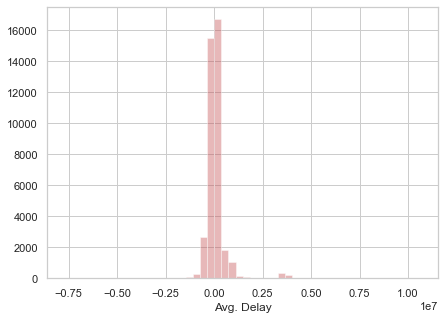

In [115]:
sns.set(rc={'figure.figsize':(7,5)})
sns.set_style("whitegrid")
x = pd.Series(Y, name="Avg. Delay")
ax = sns.distplot(x,kde=False,color="r")

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [116]:
outcome=X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()
outcome

,name_customer,doc_id
0,11078 us,1
1,17135 associates,1
2,99 CE,1
3,99 CE co,1
4,99 CE corporation,2
...,...,...
3051,YEN BROS,1
3052,YEN BROS co,1
3053,YEN BROS corp,1
3054,YEN BROS corporation,1


### You can make another distribution plot of the "doc_id" column from x_train

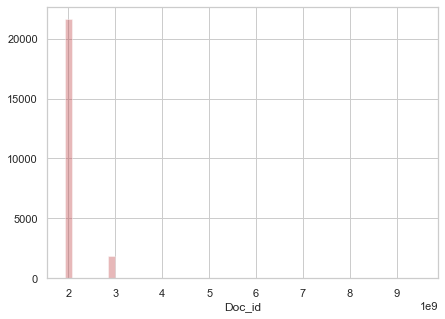

In [117]:
sns.set(rc={'figure.figsize':(7,5)})
sns.set_style("whitegrid")
x = pd.Series(X_train["doc_id"], name="Doc_id")
ax = sns.distplot(x,kde=False,color="r")

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


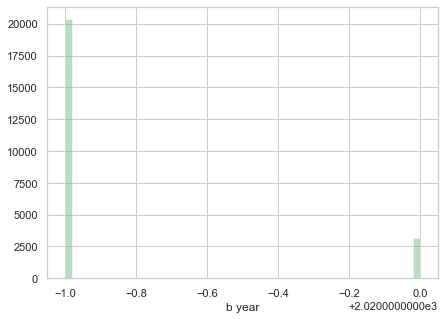

In [118]:
sns.set(rc={'figure.figsize':(7,5)})
sns.set_style("whitegrid")
x = pd.Series(X_train['buisness_year'], name="b year")
ax = sns.distplot(x,kde=False,color="g")

<AxesSubplot:ylabel='Density'>

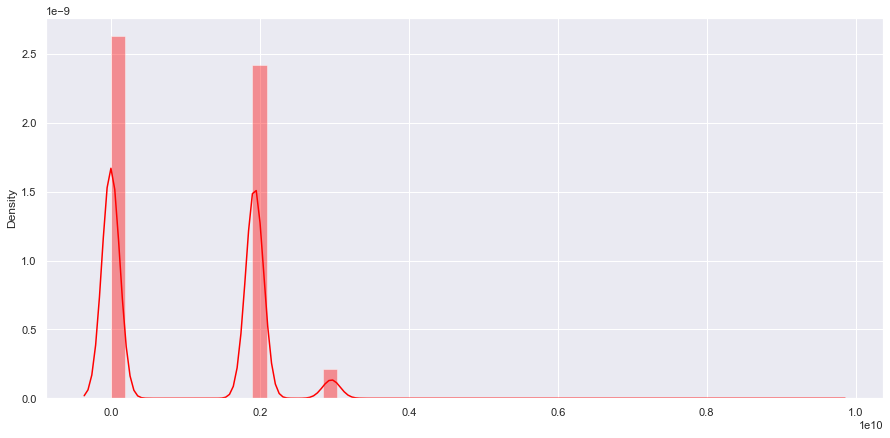

In [119]:
sns.set(rc={'figure.figsize':(15,7)})
sns.distplot(X_train[["buisness_year","doc_id"]],color='red')

# Feature Engineering 

### Display and describe the X_train dataframe 

In [120]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
46683,U001,0200769623,WAL-MAR foundation,2019.0,1930007043.0,2019-10-13,2019-10-28,2019-10-13,NAH4,38439.4
119,U001,0200772595,SAFEW corporation,2019.0,1928838009.0,2019-02-21,2019-04-27,2019-02-21,NAGD,2588.7
13099,U001,0200494102,MCCA llc,2019.0,1929296981.0,2019-05-10,2019-05-26,2019-05-10,C106,48174.0
6451,U001,0200726979,BJ'S corporation,2019.0,1930248414.0,2019-12-08,2019-12-23,2019-12-08,NAA8,786.0
20492,U001,200759878,SA us,2019.0,1929092543.0,2019-04-06,2019-04-21,2019-04-06,NAH4,55825.0
...,...,...,...,...,...,...,...,...,...,...
9723,U001,0200769623,WAL-MAR co,2019.0,1928992843.0,2019-03-20,2019-04-04,2019-03-20,NAH4,56565.4
41318,U001,0200773364,U R M,2019.0,1929020964.0,2019-03-26,2019-04-10,2019-03-26,NAA8,8710.1
6410,CA02,0140106293,ATLANT corporation,2019.0,2960527695.0,2019-02-06,2019-02-25,2019-02-15,CA10,9392.6
15221,U001,0200769623,WAL-MAR co,2019.0,1929907945.0,2019-09-21,2019-10-06,2019-09-21,NAH4,14498.9


In [121]:
X_train.describe()

,buisness_year,doc_id,converted_usd
count,23494.0,23494.0,23494.0
mean,2019.1,2013695253.9,30658.2
std,0.3,284179395.8,36383.6
min,2019.0,1928511059.0,0.8
25%,2019.0,1929181998.5,4537.0
50%,2019.0,1929732790.0,16944.9
75%,2019.0,1930212022.8,45446.9
max,2020.0,9500000133.0,668593.4


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [122]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train['business_code'])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [123]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [124]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [125]:
X_train[['business_code','business_code_enc']]

,business_code,business_code_enc
46683,U001,1
119,U001,1
13099,U001,1
6451,U001,1
20492,U001,1
...,...,...
9723,U001,1
41318,U001,1
6410,CA02,0
15221,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [126]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [127]:
X_train , X_val , X_test = custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [128]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [129]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [130]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [131]:
X_train ,X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [132]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [133]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [134]:
X_train.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [135]:
X_test.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [136]:
X_val.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [137]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year



### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [138]:
X_train ,X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [139]:
X_train['day_of_baseline_create_date'] = X_train['baseline_create_date'].dt.day
X_train['month_of_baseline_create_date'] = X_train['baseline_create_date'].dt.month
X_train['year_of_baseline_create_date'] = X_train['baseline_create_date'].dt.year

X_val['day_of_baseline_create_date'] = X_val['baseline_create_date'].dt.day
X_val['month_of_baseline_create_date'] = X_val['baseline_create_date'].dt.month
X_val['year_of_baseline_create_date'] = X_val['baseline_create_date'].dt.year


X_test['day_of_baseline_create_date'] = X_test['baseline_create_date'].dt.day
X_test['month_of_baseline_create_date'] = X_test['baseline_create_date'].dt.month
X_test['year_of_baseline_create_date'] = X_test['baseline_create_date'].dt.year

### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [140]:
X_train , X_val , X_test = custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [141]:
X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year


X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [142]:
X_train ,X_val, X_test = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [143]:
print(X_test.dtypes)
print(X_val.dtypes)
print(X_test.dtypes)

cust_number                        int32
buisness_year                    float64
doc_id                           float64
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
day_of_postingdate                 int64
month_of_postingdate               int64
year_of_postingdate                int64
day_of_baseline_create_date        int64
month_of_baseline_create_date      int64
year_of_baseline_create_date       int64
day_of_due                         int64
month_of_due                       int64
year_of_due                        int64
dtype: object
cust_number                        int32
buisness_year                    float64
doc_id                           float64
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
day_of_postingdate                 int64
mo

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [144]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])


16

- Note - Keep the code as it is, no need to change 


In [145]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [146]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [147]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [148]:
train=X_train.copy()
handling_correlation(train.copy(),0.85)

['month_of_due',
 'year_of_baseline_create_date',
 'year_of_due',
 'day_of_baseline_create_date',
 'month_of_baseline_create_date',
 'year_of_postingdate']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

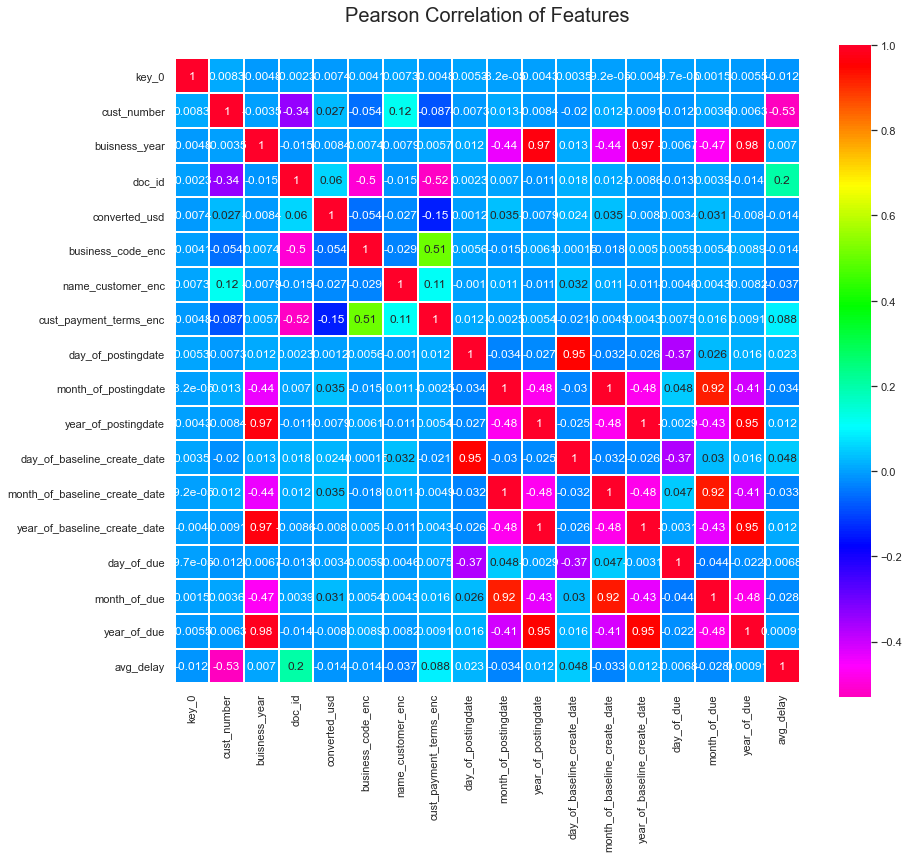

In [149]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [150]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [151]:
sel.variances_

array([1.77833834e+15, 1.16255908e-01, 8.07544916e+16, 1.32371252e+09,
       2.95552036e-01, 1.05154705e+06, 1.42931761e+02, 7.57900109e+01,
       1.22385606e+01, 1.17117448e-01, 7.72866281e+01, 1.22464552e+01,
       1.17244688e-01, 7.62405693e+01, 1.20839720e+01, 1.19220664e-01])

In [152]:
X_train

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_baseline_create_date,month_of_baseline_create_date,year_of_baseline_create_date,day_of_due,month_of_due,year_of_due
46683,200769623,2019.0,1930007043.0,38439.4,1,2964,34,13,10,2019,13,10,2019,28,10,2019
119,200772595,2019.0,1928838009.0,2588.7,1,2382,33,21,2,2019,21,2,2019,27,4,2019
13099,200494102,2019.0,1929296981.0,48174.0,1,1795,3,10,5,2019,10,5,2019,26,5,2019
6451,200726979,2019.0,1930248414.0,786.0,1,314,20,8,12,2019,8,12,2019,23,12,2019
20492,200759878,2019.0,1929092543.0,55825.0,1,2376,34,6,4,2019,6,4,2019,21,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9723,200769623,2019.0,1928992843.0,56565.4,1,2961,34,20,3,2019,20,3,2019,4,4,2019
41318,200773364,2019.0,1929020964.0,8710.1,1,2833,20,26,3,2019,26,3,2019,10,4,2019
6410,140106293,2019.0,2960527695.0,9392.6,0,190,4,6,2,2019,15,2,2019,25,2,2019
15221,200769623,2019.0,1929907945.0,14498.9,1,2961,34,21,9,2019,21,9,2019,6,10,2019


### Features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [153]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [154]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [155]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [156]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

536143.94206637

### Display The Comparison Lists

In [157]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[276059697706.7819],[0.3568596683565973],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [158]:
from sklearn.svm import SVR
Algorithm.append('Support Vector Regression')
svrregg = SVR()
svrregg.fit(X_train, y_train)
predicted= svrregg.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [159]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [160]:
predict_test= svrregg.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

658884.2150683587

### Display The Comparison Lists

In [161]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression'],[276059697706.7819, 431871487393.30365],[0.3568596683565973, -0.00613734614922512],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [162]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('Decision Tree Regressor')
DTregg = DecisionTreeRegressor()
DTregg.fit(X_train, y_train)
predicted= DTregg.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [163]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [164]:
predict_test= DTregg.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

538128.1374045344

### Display The Comparison Lists

In [165]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regressor'],[276059697706.7819, 431871487393.30365, 245966868520.65845],[0.3568596683565973, -0.00613734614922512, 0.4269673744202639],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [166]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('Random Forest Regressor')
RFRregg = RandomForestRegressor()
RFRregg.fit(X_train, y_train)
predicted= RFRregg.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [167]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [168]:
predict_test= RFRregg.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

355723.8038093147

### Display The Comparison Lists


In [169]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regressor', 'Random Forest Regressor'],[276059697706.7819, 431871487393.30365, 245966868520.65845, 99166685726.71346],[0.3568596683565973, -0.00613734614922512, 0.4269673744202639, 0.7689699160143333],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [170]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [171]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [172]:
predict_test= RFRregg.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

355723.8038093147

### Display The Comparison Lists


In [173]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'XGB Regressor'],[276059697706.7819, 431871487393.30365, 245966868520.65845, 99166685726.71346, 87842159567.79382],[0.3568596683565973, -0.00613734614922512, 0.4269673744202639, 0.7689699160143333, 0.7953528309057635],

## You need to make the comparison list into a comparison dataframe 

In [174]:
lst= {'MSE_Score':MSE_Score, 'R2_Score': R2_Score,'Algorithm': Algorithm}  
dframe = pd.DataFrame(lst)  

In [175]:
dframe

,MSE_Score,R2_Score,Algorithm
0,276059697706.8,0.4,LinearRegression
1,431871487393.3,-0.0,Support Vector Regression
2,245966868520.7,0.4,Decision Tree Regressor
3,99166685726.7,0.8,Random Forest Regressor
4,87842159567.8,0.8,XGB Regressor


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [176]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [177]:
mean_squared_error(y_test,predictedfinal,squared=False)

296381.7800874302

### Calculate the mean Square Error for validation dataset

In [178]:
mean_squared_error(y_val,predict_testfinal,squared=False)

333529.90768799244

### Calculate the R2 score for test

In [179]:
r2_score(y_test,predictedfinal)

0.7953528309057635

### Calculate the R2 score for Validation

In [180]:
r2_score(y_val,predict_testfinal)

0.7420576005320136

### Calculate the Accuracy for train Dataset 

### Calculate the accuracy for validation

In [184]:
accuracy_validation=(r2_score(y_val,predict_testfinal))*100
print("Accuracy for validation= ",accuracy_validation,"%")

Accuracy for validation=  74.20576005320136 %


### Calculate the accuracy for test

In [185]:
accuracy_test=(r2_score(y_test,predictedfinal))*100
print("Accuracy for test = ",accuracy_test,"%")

Accuracy for test =  79.53528309057634 %


## Specify the reason behind choosing your machine learning model 

- Note : Provide your answer as a text here

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [186]:
nulldata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2960623488.0,2020-03-30,2020-04-10,2020-03-31,CA10,2309.8
7,U001,0200744019,TARG us,NaT,2020.0,1930659387.0,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.0
10,U001,0200418007,AM,NaT,2020.0,1930610806.0,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.6
14,U001,0200739534,OK systems,NaT,2020.0,1930788296.0,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.6
15,U001,0200353024,DECA corporation,NaT,2020.0,1930817482.0,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.1


### Check for the number of rows and columns in the nulldata

In [187]:
nulldata.shape

(9681, 11)

### Check the Description and Information of the nulldata 

In [188]:
nulldata.describe()

,buisness_year,doc_id,converted_usd
count,9681.0,9681.0,9681.0
mean,2020.0,2006164655.6,32065.7
std,0.0,267362850.0,35419.6
min,2020.0,1930535090.0,0.7
25%,2020.0,1930658373.0,5607.2
50%,2020.0,1930730972.0,19024.2
75%,2020.0,1930818497.0,47752.6
max,2020.0,2960635652.0,653644.8


### Storing the Nulldata into a different dataset 
# for BACKUP

In [189]:
nulldata1=nulldata.copy()
nulldata1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9681 non-null   object        
 1   cust_number           9681 non-null   object        
 2   name_customer         9681 non-null   object        
 3   clear_date            0 non-null      datetime64[ns]
 4   buisness_year         9681 non-null   float64       
 5   doc_id                9681 non-null   float64       
 6   posting_date          9681 non-null   datetime64[ns]
 7   due_in_date           9681 non-null   datetime64[ns]
 8   baseline_create_date  9681 non-null   datetime64[ns]
 9   cust_payment_terms    9681 non-null   object        
 10  converted_usd         9681 non-null   float64       
dtypes: datetime64[ns](4), float64(3), object(4)
memory usage: 907.6+ KB


### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [190]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [191]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [192]:
nulldata['day_of_postingdate'] = nulldata['posting_date'].dt.day
nulldata['month_of_postingdate'] = nulldata['posting_date'].dt.month
nulldata['year_of_postingdate'] = nulldata['posting_date'].dt.year

nulldata['day_of_due'] = nulldata['due_in_date'].dt.day
nulldata['month_of_due'] = nulldata['due_in_date'].dt.month
nulldata['year_of_due'] = nulldata['due_in_date'].dt.year

nulldata['day_of_createdate'] = nulldata['baseline_create_date'].dt.day
nulldata['month_of_createdate'] = nulldata['baseline_create_date'].dt.month
nulldata['year_of_createdate'] = nulldata['baseline_create_date'].dt.year

### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [193]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])


### Check for the datatypes of all the columns of Nulldata

In [194]:
nulldata.dtypes

business_code                     object
cust_number                        int32
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
cust_payment_terms                object
converted_usd                    float64
business_code_enc                  int32
day_of_postingdate                 int64
month_of_postingdate               int64
year_of_postingdate                int64
day_of_due                         int64
month_of_due                       int64
year_of_due                        int64
day_of_createdate                  int64
month_of_createdate                int64
year_of_createdate                 int64
cust_payment_terms_enc             int32
name_customer_enc                  int32
dtype: object

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [195]:
nulldata.drop(["business_code","baseline_create_date","due_in_date","posting_date","name_customer","clear_date","cust_payment_terms"],axis=1,inplace=True)

### Check the information of the "nulldata" dataframe

In [196]:
nulldata.shape

(9681, 16)

In [197]:
nulldata.head()

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_due,month_of_due,year_of_due,day_of_createdate,month_of_createdate,year_of_createdate,cust_payment_terms_enc,name_customer_enc
3,140105686,2020.0,2960623488.0,2309.8,67,30,3,2020,10,4,2020,31,3,2020,4,2688
7,200744019,2020.0,1930659387.0,11173.0,67,19,3,2020,3,4,2020,19,3,2020,20,2771
10,200418007,2020.0,1930610806.0,3525.6,67,11,3,2020,26,3,2020,11,3,2020,20,90
14,200739534,2020.0,1930788296.0,121105.6,67,15,4,2020,30,4,2020,15,4,2020,20,2012
15,200353024,2020.0,1930817482.0,3726.1,67,23,4,2020,26,4,2020,16,4,2020,36,718


In [198]:
nulldata.dtypes

cust_number                 int32
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
cust_payment_terms_enc      int32
name_customer_enc           int32
dtype: object

### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [199]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9681 non-null   int32  
 1   buisness_year           9681 non-null   float64
 2   doc_id                  9681 non-null   float64
 3   converted_usd           9681 non-null   float64
 4   business_code_enc       9681 non-null   int32  
 5   day_of_postingdate      9681 non-null   int64  
 6   month_of_postingdate    9681 non-null   int64  
 7   year_of_postingdate     9681 non-null   int64  
 8   day_of_due              9681 non-null   int64  
 9   month_of_due            9681 non-null   int64  
 10  year_of_due             9681 non-null   int64  
 11  day_of_createdate       9681 non-null   int64  
 12  month_of_createdate     9681 non-null   int64  
 13  year_of_createdate      9681 non-null   int64  
 14  cust_payment_terms_enc  9681 non-null  

In [200]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7832 entries, 4842 to 15099
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cust_number                    7832 non-null   int32  
 1   buisness_year                  7832 non-null   float64
 2   doc_id                         7832 non-null   float64
 3   converted_usd                  7832 non-null   float64
 4   business_code_enc              7832 non-null   int32  
 5   name_customer_enc              7832 non-null   int32  
 6   cust_payment_terms_enc         7832 non-null   int32  
 7   day_of_postingdate             7832 non-null   int64  
 8   month_of_postingdate           7832 non-null   int64  
 9   year_of_postingdate            7832 non-null   int64  
 10  day_of_baseline_create_date    7832 non-null   int64  
 11  month_of_baseline_create_date  7832 non-null   int64  
 12  year_of_baseline_create_date   7832 non-null

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [201]:
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_baseline_create_date', 'month_of_baseline_create_date',
       'year_of_baseline_create_date', 'day_of_due', 'month_of_due',
       'year_of_due'],
      dtype='object')

In [202]:
nulldata.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [203]:
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

In [204]:
nulldata2.head()

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
3,140105686,2020.0,2960623488.0,2309.8,67,2688,4,30,3,2020,31,3,2020,10,4,2020
7,200744019,2020.0,1930659387.0,11173.0,67,2771,20,19,3,2020,19,3,2020,3,4,2020
10,200418007,2020.0,1930610806.0,3525.6,67,90,20,11,3,2020,11,3,2020,26,3,2020
14,200739534,2020.0,1930788296.0,121105.6,67,2012,20,15,4,2020,15,4,2020,30,4,2020
15,200353024,2020.0,1930817482.0,3726.1,67,718,36,23,4,2020,16,4,2020,26,4,2020


### Now you can pass this dataset into you final model and store it into "final_result"

In [205]:
predictedfinal1 = regressorfinal.predict(nulldata2)
final_result=predictedfinal1

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [206]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

In [207]:
final_result

0       648656.4
1       337409.6
2      1082230.5
3       475513.3
4      -300302.5
          ...   
9676     77016.5
9677     78361.9
9678   -129137.9
9679    295392.2
9680     27639.3
Name: avg_delay, Length: 9681, dtype: float32

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [208]:
nulldata1.reset_index(drop=True,inplace=True)
Final = nulldata1.merge(final_result , on = nulldata.index )

### Display the "Final" dataframe 

In [209]:
Final.head()

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,3,CA02,0140105686,SYSC llc,NaT,2020.0,2960623488.0,2020-03-30,2020-04-10,2020-03-31,CA10,2309.8,648656.4
1,7,U001,0200744019,TARG us,NaT,2020.0,1930659387.0,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.0,337409.6
2,10,U001,0200418007,AM,NaT,2020.0,1930610806.0,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.6,1082230.5
3,14,U001,0200739534,OK systems,NaT,2020.0,1930788296.0,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.6,475513.3
4,15,U001,0200353024,DECA corporation,NaT,2020.0,1930817482.0,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.1,-300302.5


### Check for the Number of Rows and Columns in your "Final" dataframe 

In [210]:
Final.shape

(9681, 13)

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [211]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

In [212]:
Final['clear_date']

0      2020-04-17 12:10:56.375000000
1      2020-04-06 21:43:29.593750000
2      2020-04-07 12:37:10.500000000
3      2020-05-05 12:05:13.281250000
4      2020-04-22 12:34:57.531250000
                    ...             
9676   2020-03-25 21:23:36.476562500
9677   2020-05-18 21:46:01.921875000
9678   2020-03-24 12:07:42.125000000
9679   2020-04-12 10:03:12.250000000
9680   2020-05-06 07:40:39.251953125
Name: clear_date, Length: 9681, dtype: datetime64[ns]

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [213]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

In [214]:
Final['avg_delay']

0       7.0
1       3.0
2      12.0
3       5.0
4      -4.0
       ... 
9676    0.0
9677    0.0
9678   -2.0
9679    3.0
9680    0.0
Name: avg_delay, Length: 9681, dtype: float64

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [215]:

bins= [0,15,30,45,60,100]
labels =['0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [216]:
Final.head()

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay,Aging Bucket
0,3,CA02,0140105686,SYSC llc,2020-04-17 12:10:56.375000,2020.0,2960623488.0,2020-03-30,2020-04-10,2020-03-31,CA10,2309.8,7.0,0-15
1,7,U001,0200744019,TARG us,2020-04-06 21:43:29.593750,2020.0,1930659387.0,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.0,3.0,0-15
2,10,U001,0200418007,AM,2020-04-07 12:37:10.500000,2020.0,1930610806.0,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.6,12.0,0-15
3,14,U001,0200739534,OK systems,2020-05-05 12:05:13.281250,2020.0,1930788296.0,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.6,5.0,0-15
4,15,U001,0200353024,DECA corporation,2020-04-22 12:34:57.531250,2020.0,1930817482.0,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.1,-4.0,NaN


In [217]:
Final.drop(['key_0','avg_delay'],axis=1,inplace=True)

### Display the count of each categoty of new "Aging Bucket" column 

In [218]:
Final["Aging Bucket"].value_counts()

0-15               8237
16-30               205
31-45                93
46-60                 9
Greatar than 60       3
Name: Aging Bucket, dtype: int64

### Display your final dataset with aging buckets 

In [219]:
Final.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Aging Bucket
0,CA02,0140105686,SYSC llc,2020-04-17 12:10:56.375000,2020.0,2960623488.0,2020-03-30,2020-04-10,2020-03-31,CA10,2309.8,0-15
1,U001,0200744019,TARG us,2020-04-06 21:43:29.593750,2020.0,1930659387.0,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.0,0-15
2,U001,0200418007,AM,2020-04-07 12:37:10.500000,2020.0,1930610806.0,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.6,0-15
3,U001,0200739534,OK systems,2020-05-05 12:05:13.281250,2020.0,1930788296.0,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.6,0-15
4,U001,0200353024,DECA corporation,2020-04-22 12:34:57.531250,2020.0,1930817482.0,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.1,NaN


### Store this dataframe into the .csv format

In [220]:
Final.to_csv('FinalPredicted.csv')

# END OF THE PROJECT